In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
! ls ../csv/kid

kid_rep100_mmdestunbiased_p3.csv  kid_rep100_mmdestunbiased_p6.csv


In [54]:
def plot_df(df, savefig=False):
    feature_time = df['feature_time_ms'].iloc[0]
    block_mmd = df[df['method'] == 'block-mmd']
    tensorsketch = df[(df['method'] == 'rf') & (df['proj'] == 'countsketch_scatter')]
    tensorsrht_real_block = df[(df['method'] == 'rf') & (df['proj'] == 'srht') & (df['full_cov'] == False) & (df['complex_real'] == False)]
    tensorsrht_real_full = df[(df['method'] == 'rf') & (df['proj'] == 'srht') & (df['full_cov'] == True) & (df['complex_real'] == False)]
    tensorsrht_comp_block = df[(df['method'] == 'rf') & (df['proj'] == 'srht') & (df['full_cov'] == False) & (df['complex_real'] == True)]
    tensorsrht_comp_full = df[(df['method'] == 'rf') & (df['proj'] == 'srht') & (df['full_cov'] == True) & (df['complex_real'] == True)]
    
#     print('TensorSRHT ratio:', tensorsrht_comp_full['std'].values / tensorsrht_real_full['std'].values)
    
    rademacher_real = df[(df['method'] == 'rf') & (df['proj'] == 'rademacher') & (df['full_cov'] == False) & (df['complex_real'] == False)]
    rademacher_comp = df[(df['method'] == 'rf') & (df['proj'] == 'rademacher') & (df['full_cov'] == False) & (df['complex_real'] == True)]
    
#     print('Rademacher ratio:', rademacher_comp['std'].values / rademacher_real['std'].values)
    
    gaussian_real = df[(df['method'] == 'rf') & (df['proj'] == 'gaussian') & (df['full_cov'] == False) & (df['complex_real'] == False)]
    gaussian_comp = df[(df['method'] == 'rf') & (df['proj'] == 'gaussian') & (df['full_cov'] == False) & (df['complex_real'] == True)]
    
#     print('Gaussian ratio:', gaussian_comp['std'].values / gaussian_real['std'].values)
    
    plt.figure(dpi=300)
    plt.plot((block_mmd['metric_time_ms'] + feature_time).values / 1000., block_mmd['std'], label='Block MMD')
    plt.plot((tensorsketch['metric_time_ms'] + feature_time).values / 1000., tensorsketch['std'], label='TensorSketch')
#     plt.plot((tensorsrht_real_block['metric_time_ms'] + feature_time).values / 1000., tensorsrht_real_block['std'], label='TensorSRHT real block')
    plt.plot((tensorsrht_real_full['metric_time_ms'] + feature_time).values / 1000., tensorsrht_real_full['std'].values, color='green', label='TensorSRHT Real')
#     plt.plot((tensorsrht_comp_block['metric_time_ms'] + feature_time).values / 1000., tensorsrht_comp_block['std'], label='TensorSRHT complex block')
    plt.plot((tensorsrht_comp_full['metric_time_ms'] + feature_time).values / 1000., tensorsrht_comp_full['std'], color='green', label='TensorSRHT Comp.-to-Real', linestyle='dashed')
#     plt.plot((rademacher_real['metric_time_ms'] + feature_time).values / 1000., rademacher_real['std'], label='Rademacher real')
#     plt.plot((rademacher_comp['metric_time_ms'] + feature_time).values / 1000., rademacher_comp['std'], label='Rademacher complex')
#     plt.plot((gaussian_real['metric_time_ms'] + feature_time).values / 1000., gaussian_real['std'], label='Gaussian real')
#     plt.plot((gaussian_comp['metric_time_ms'] + feature_time).values / 1000., gaussian_comp['std'], label='Gaussian complex')
    xleft = 120
    plt.axvspan(xleft, feature_time / 1000., color='r', alpha=0.2, lw=0)
    plt.axvline(feature_time / 1000., color='r', linestyle='dashed')
    plt.yscale('log')
    plt.xlim(left=xleft)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.text(0.5*(xleft+feature_time / 1000.), 3*10**(-5), 'Inception Feature Computation', # 2.5*10**(-5)
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        fontsize=12, color='black') # transform=ax.transAxes
    
    #plt.tick_params(axis='y', which='left', labelleft='off', labelright='on', left=False, right=True)
    plt.ylabel('Std. Dev.') # labelpad=-410
    plt.xlabel('Time (seconds)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    if savefig:
        plt.savefig('../figures/kid.pdf', dpi=300)
    plt.show()

In [56]:
df

,feature_time_ms,mean,method,metric_time_ms,n,std,D,complex_real,full_cov,proj
0,129992.20077,-0.000021,block-mmd,120.523379,100.0,1.399917e-03,NaN,NaN,NaN,NaN
1,129992.20077,-0.000044,block-mmd,308.925594,1000.0,1.105302e-04,NaN,NaN,NaN,NaN
2,129992.20077,-0.000009,block-mmd,4674.842026,5000.0,2.117993e-05,NaN,NaN,NaN,NaN
3,129992.20077,-0.000011,block-mmd,16868.139975,10000.0,7.574231e-06,NaN,NaN,NaN,NaN
4,129992.20077,-0.000011,block-mmd,26782.539469,15000.0,5.499454e-06,NaN,NaN,NaN,NaN
5,129992.20077,-0.000010,block-mmd,38682.159972,20000.0,3.675801e-06,NaN,NaN,NaN,NaN
6,129992.20077,-0.000010,rf,3246.337648,NaN,7.752205e-06,64.0,0.0,0.0,countsketch_scatter
7,129992.20077,-0.000010,rf,3375.134327,NaN,5.809123e-06,128.0,0.0,0.0,countsketch_scatter
8,129992.20077,-0.000010,rf,3702.682456,NaN,4.441388e-06,256.0,0.0,0.0,countsketch_scatter
9,129992.20077,-0.000010,rf,4222.914400,NaN,2.352070e-06,512.0,0.0,0.0,countsketch_scatter


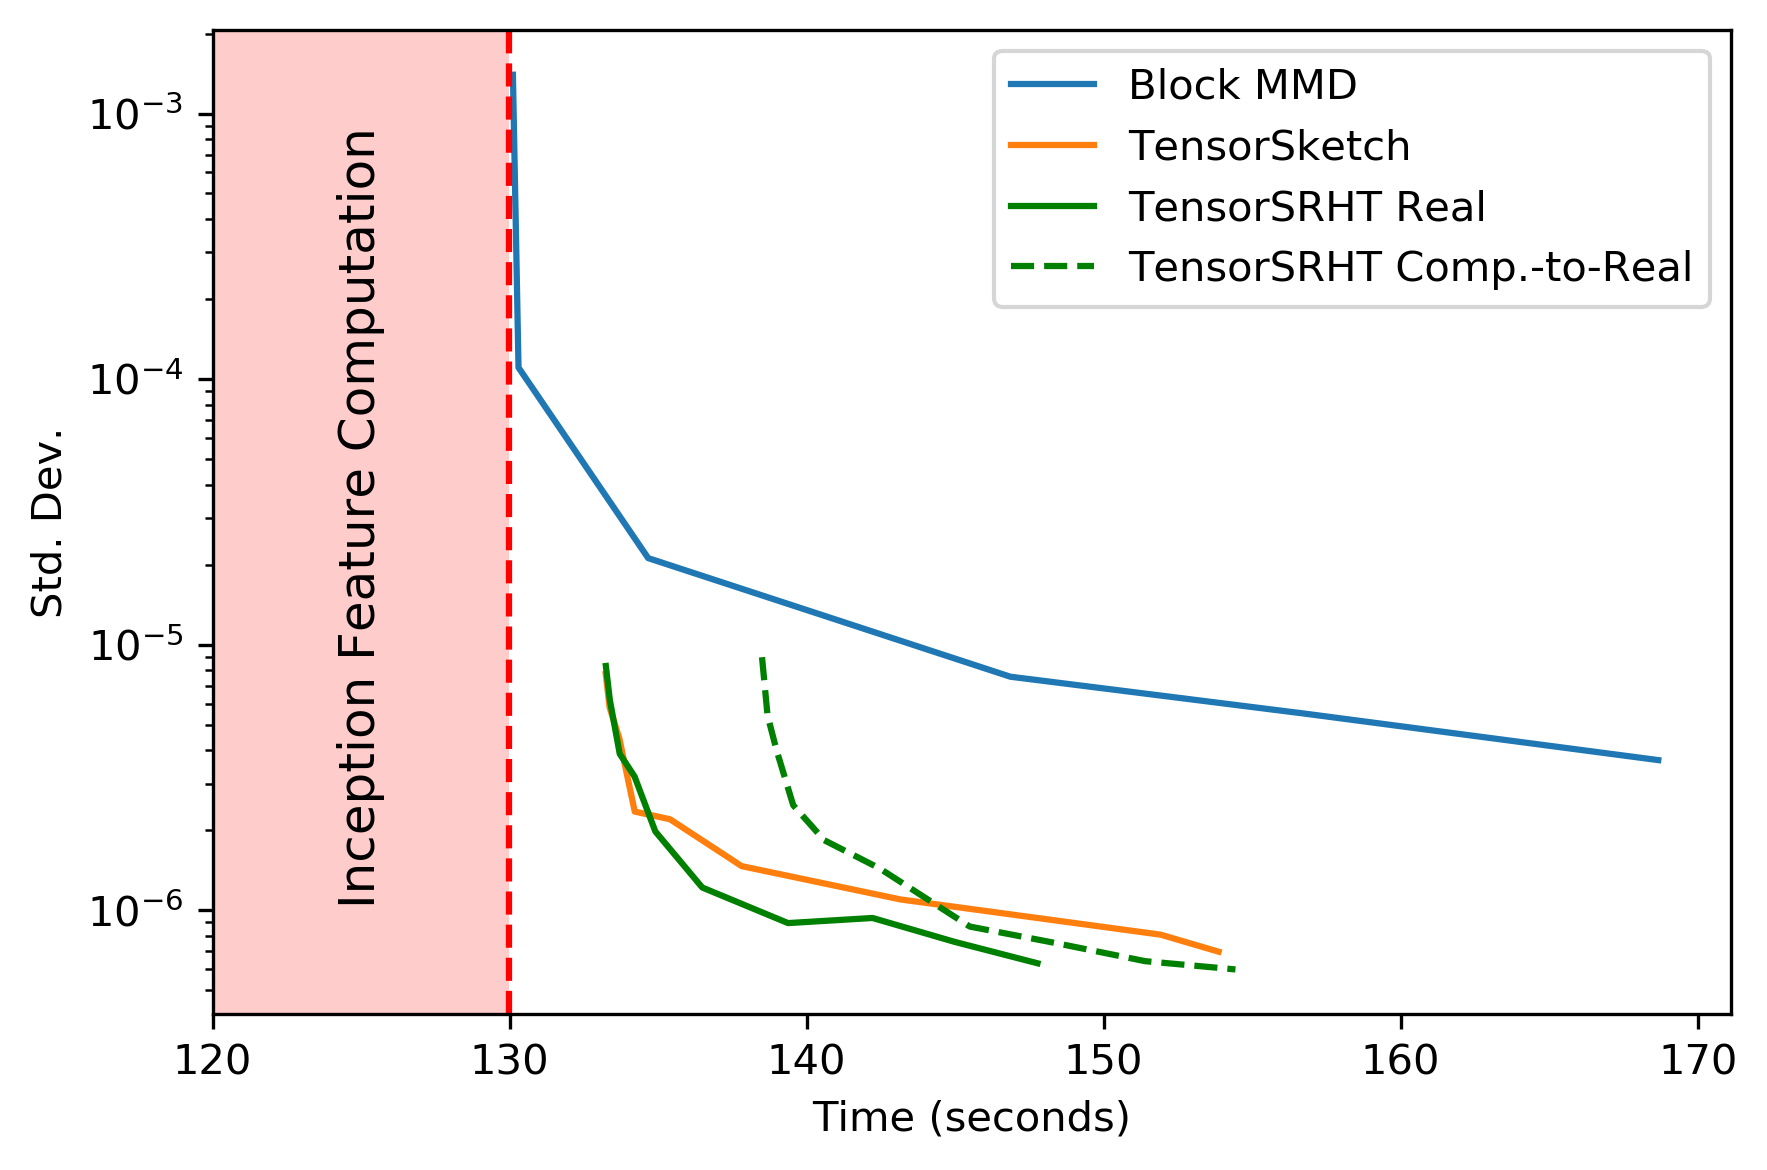

In [55]:
df = pd.read_csv('../csv/kid/kid_rep100_mmdestunbiased_p3.csv')
df.head()
plot_df(df, savefig=True)

In [52]:
# lines end when OOM

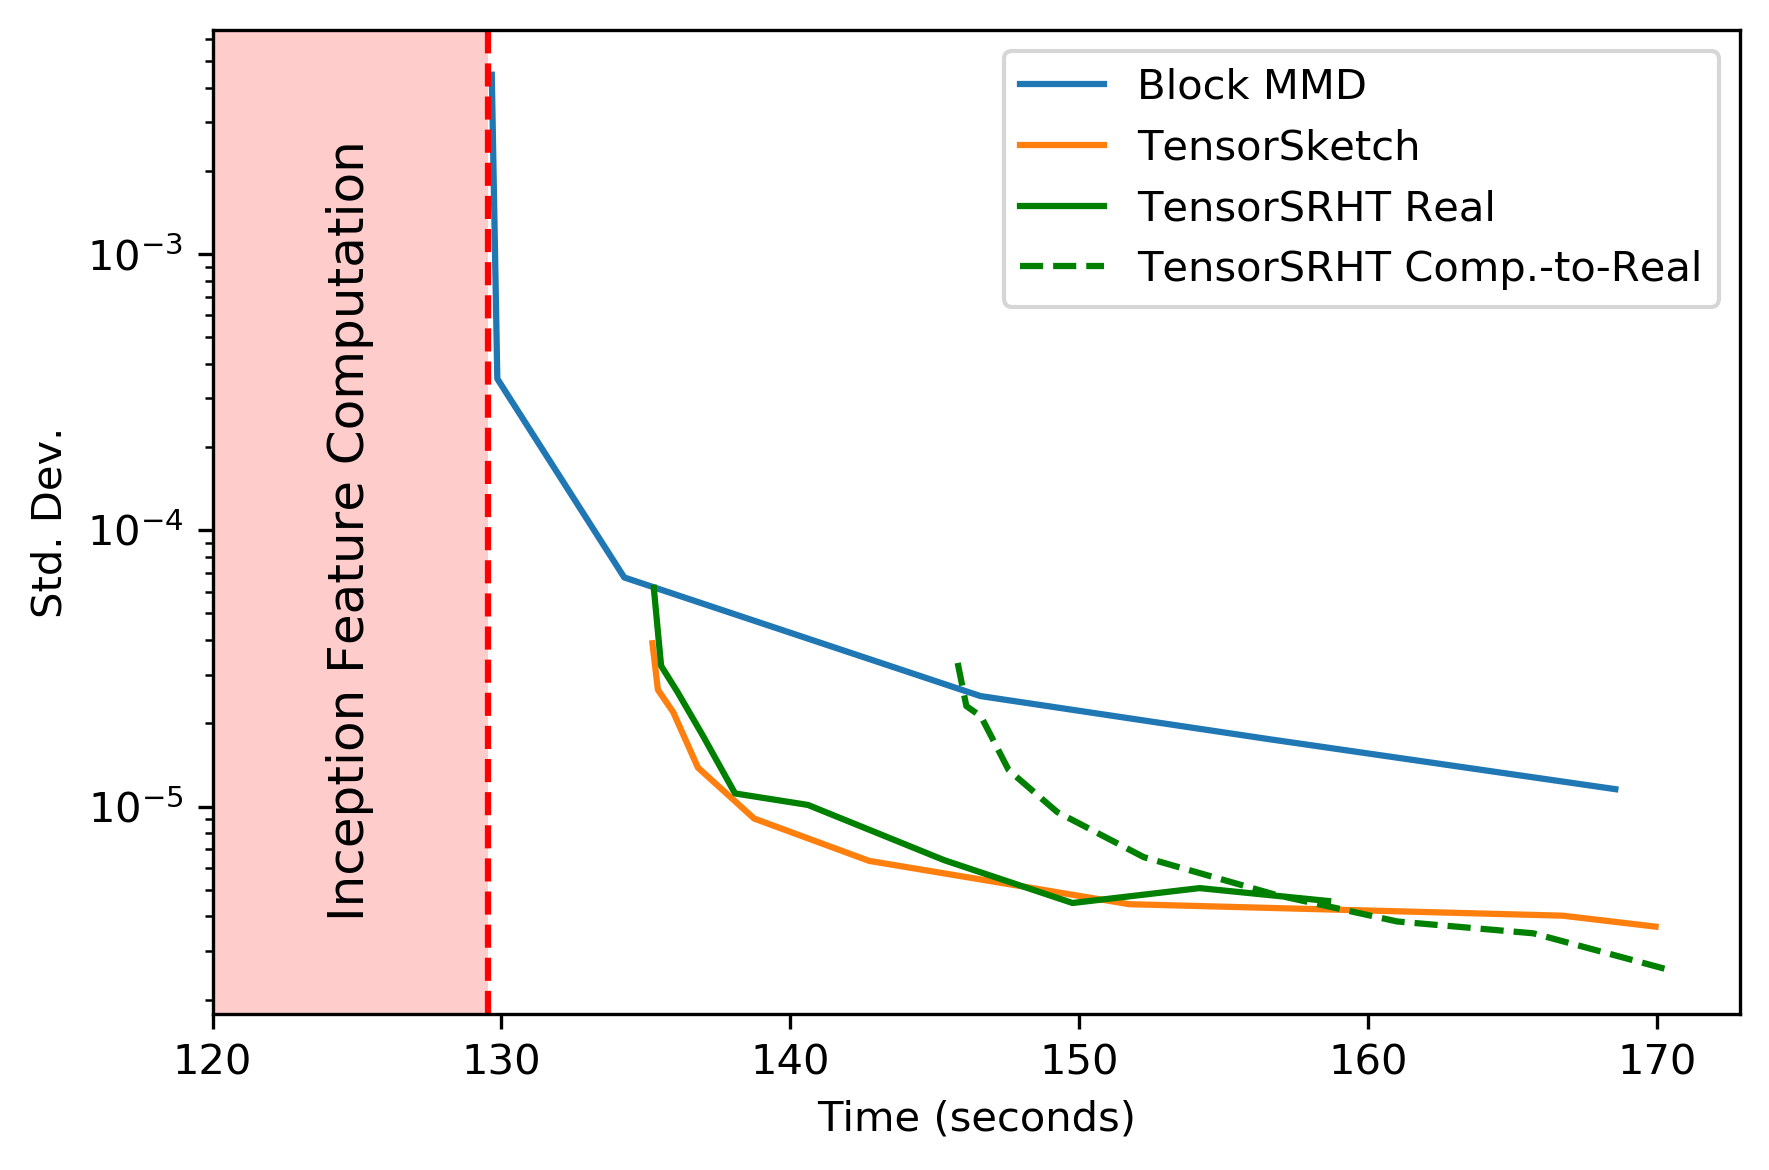

In [53]:
df = pd.read_csv('../csv/kid/kid_rep100_mmdestunbiased_p6.csv')
df.head()
plot_df(df, savefig=True)